In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from numpy import asarray
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation




In [2]:
text_data = pd.read_csv("nb_ok1.csv",encoding= 'unicode_escape')

In [3]:
text_data.drop('HeatNo', axis=1,inplace = True)
text_data.drop('Blow', axis=1,inplace = True )
text_data.drop('Erosion', axis=1,inplace = True)
X = text_data.drop(columns = ['Penetra'])
y = text_data['Penetra']
X.shape
y.shape

(493,)

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
y = y.reshape(-1,1)
y.shape

(493, 1)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)

(394, 7)
(99, 7)


In [7]:
from sklearn.ensemble import RandomForestRegressor
  

#Create a Gaussian Classifier
clf=RandomForestRegressor(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [8]:
accuracy_RandomForest = clf.score(X_test,y_test)
accuracy_RandomForest

0.9741667926452768

In [32]:
y = y_pred
y = y.reshape(-1,1)
y.shape
y = y[:15]

In [10]:
from sklearn.metrics import r2_score
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(X_train, y_train)
  
# Model making a prediction on test data
prediction = model.predict(X_test)
  
# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(y_test, prediction)}")

r2 Score Of Test Set : 0.5986426574502893


C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
y1 = prediction
y1 = y1.reshape(-1,1)
y1.shape
y1=y1[:15]

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense , Activation , Dropout
from tensorflow.keras.optimizers import Adam
ANN_model = keras.Sequential()
ANN_model.add(Dense(50 , input_dim =7))
ANN_model.add(Activation('relu'))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))

ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))

ANN_model.compile(loss = 'mse' , optimizer='adam')
ANN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_2 (Activation)    (None, 150)               0

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

model = lm.fit(X_train, y_train)

y_pre= lm.predict(X_test)

In [34]:
y2 = y_pre[:15]
y2.shape

(15, 1)

In [35]:
x = y_test[:15]
x.shape

(15, 1)

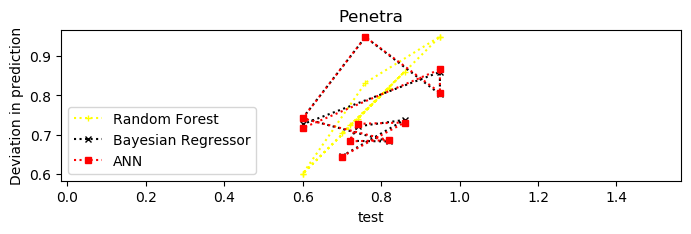

In [31]:

marker =['o','.','x','+','v','^','<','>','s','d']
plt.figure(figsize=(8,2),dpi=100)
plt.plot(x,y,marker[3],color='yellow',markersize=4,linestyle=':',label= 'Random Forest')

plt.plot(x,y1,marker[2],color='black',markersize=4,linestyle=':',label= 'Bayesian Regressor')
plt.plot(x,y2,marker[8],color='red',markersize=4,linestyle=':',label= 'ANN')
plt.xlabel("test")
plt.ylabel("Deviation in prediction")
plt.axis('equal')
plt.legend(loc='lower left')
plt.title("Penetra")
plt.show()

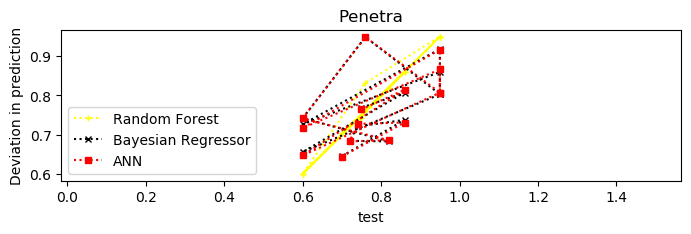

In [36]:

marker =['o','.','x','+','v','^','<','>','s','d']
plt.figure(figsize=(8,2),dpi=100)
plt.plot(x,y,marker[3],color='yellow',markersize=4,linestyle=':',label= 'Random Forest')

plt.plot(x,y1,marker[2],color='black',markersize=4,linestyle=':',label= 'Bayesian Regressor')
plt.plot(x,y2,marker[8],color='red',markersize=4,linestyle=':',label= 'ANN')
plt.xlabel("test")
plt.ylabel("Deviation in prediction")
plt.axis('equal')
plt.legend(loc='lower left')
plt.title("Penetra")
plt.show()